# 🫀 Heart Disease Dataset
이 심장 질환 데이터 세트는 이미 독립적으로 사용 가능하지만 이전에는 결합되지 않은 5개의 인기 심장 질환 데이터 세트를 결합하여 선별되었습니다. 이 데이터 세트에는 5개의 심장 데이터 세트가 11개의 공통 기능과 결합되어 있어 지금까지 연구 목적으로 사용할 수 있는 심장 질환 데이터 세트 중 가장 큰 것입니다. 큐레이션에 사용되는 5개의 데이터 세트는 다음과 같습니다.  
  
- 클리블랜드
- 헝가리 인
- 스위스
- 롱비치 버지니아
- Statlog(심장) 데이터 세트.
  
이 데이터 세트는 11가지 기능을 갖춘 1,190개의 인스턴스로 구성됩니다. 이러한 데이터 세트는 CAD 관련 기계 학습 및 데이터 마이닝 알고리즘에 대한 고급 연구를 돕고 궁극적으로 임상 진단 및 조기 치료를 발전시키기 위해 한곳에 수집 및 결합되었습니다.  
  
  


### Attribute & Description   
- Sex 
    - 1 = male, 0= female; 
- Chest Pain Type
    - Value 1: typical angina  
    - Value 2: atypical angina  
    - Value 3: non-anginal pain  
    - Value 4: asymptomatic  
- Fasting Blood sugar
    - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
- Resting electrocardiogram results|    
    - Value 0: normal  
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- Exercise induced angina
    - 1 = yes; 0 = no  
- the slope of the peak exercise ST segment    
    - Value 1: upsloping  
    - Value 2: flat  
    - Value 3: downsloping  
- class 
    - 1 = heart disease, 0 = Normal  
 
 


In [313]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

import shap


# 데이터 로드

In [314]:
df = pd.read_csv("archive/heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# EDA

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [316]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [317]:
df.duplicated().sum()

272

In [318]:
df.loc[df[df.duplicated(keep=False)].index]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
90,49,0,2,110,208,0,0,160,0,0.0,1,0
163,49,0,2,110,208,0,0,160,0,0.0,1,0
556,58,1,3,150,219,0,1,118,1,0.0,2,1
604,58,1,3,150,219,0,1,118,1,0.0,2,1
617,70,1,4,130,322,0,2,109,0,2.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


In [319]:
df.loc[df[df.duplicated()].index] # 데이터 확장을 위한 중복 데이터인지 아니면 지를 확실하게 알 수 가 없다. 일단 두 개로 나누어서 성능 비교 후 

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
163,49,0,2,110,208,0,0,160,0,0.0,1,0
604,58,1,3,150,219,0,1,118,1,0.0,2,1
887,63,1,1,145,233,1,2,150,0,2.3,3,0
888,67,1,4,160,286,0,2,108,1,1.5,2,1
889,67,1,4,120,229,0,2,129,1,2.6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1156,42,1,3,130,180,0,0,150,0,0.0,1,0
1157,61,1,4,140,207,0,2,138,1,1.9,1,1
1158,66,1,4,160,228,0,2,138,0,2.3,1,0
1159,46,1,4,140,311,0,0,120,1,1.8,2,1


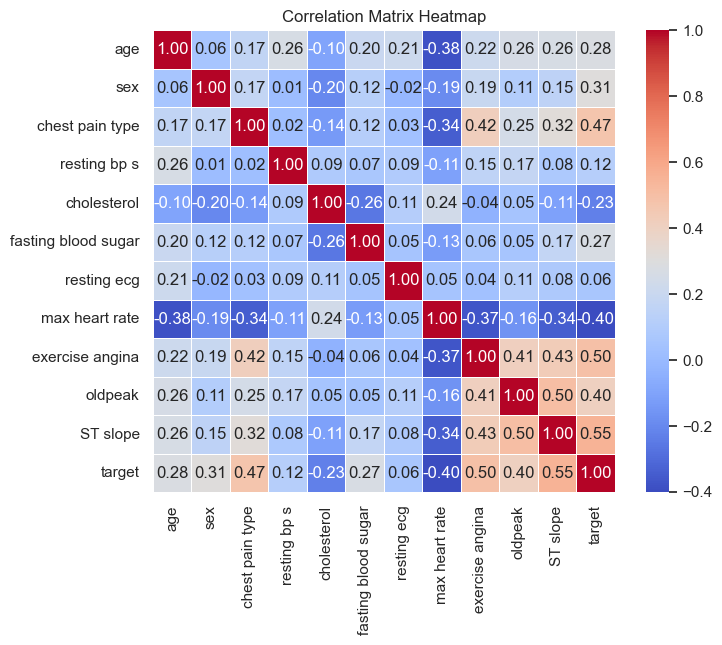

In [348]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [320]:
# 중복값을 삭제하지 않은 값
df_nodd = df.copy()

In [321]:
# 원본 데이터는 중복값을 지운 것을 사용
df = df.drop_duplicates(keep='first', ignore_index=True)
df.duplicated().sum()

0

In [322]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [323]:
df.tail(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
908,63,1,4,140,187,0,2,144,1,4.0,1,1
909,63,0,4,124,197,0,0,136,1,0.0,2,1
910,41,1,2,120,157,0,0,182,0,0.0,1,0
911,59,1,4,164,176,1,2,90,0,1.0,2,1
912,57,0,4,140,241,0,0,123,1,0.2,2,1
913,45,1,1,110,264,0,0,132,0,1.2,2,1
914,68,1,4,144,193,1,0,141,0,3.4,2,1
915,57,1,4,130,131,0,0,115,1,1.2,2,1
916,57,0,2,130,236,0,2,174,0,0.0,2,1
917,38,1,3,138,175,0,0,173,0,0.0,1,0


max :  77 | min :  28
평균 값 :  53.51


Text(0.5, 0, 'age')

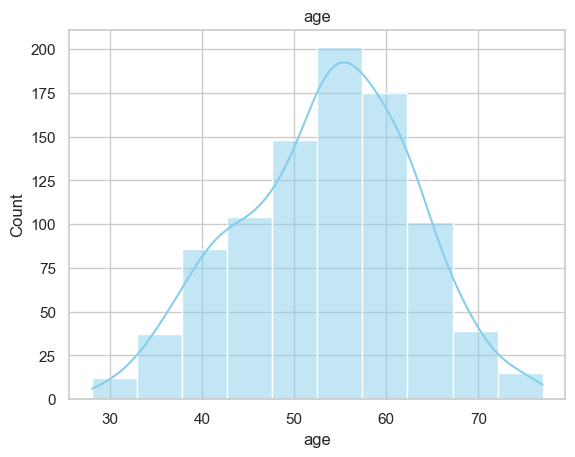

In [324]:
# age 데이터 값의 이상치 확인
print("max : " , df.age.max() , "| min : " , df.age.min())
print("평균 값 : ", df.age.mean().round(2))
sns.set(style="whitegrid")
sns.histplot(df["age"], kde=True, color="skyblue", bins=10)
plt.title("age")
plt.xlabel("age")

sex
1    725
0    193
Name: count, dtype: int64
sex
1    0.79
0    0.21
Name: proportion, dtype: float64


<Axes: xlabel='sex'>

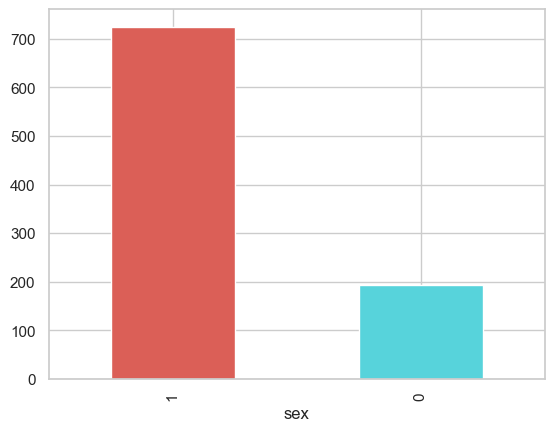

In [325]:
# sex 데이터 값 확인
print(df.sex.value_counts())
print(df.sex.value_counts(normalize=True).round(2))
colors = sns.color_palette('hls',2)
# 1 = male, 0= female;
df.sex.value_counts().plot(kind="bar",color=colors)
# 성비가 불균형 적인 문제가 있다. 해당 비율을 고정적으로 하여 tain set과 text set을 나누어야 한다.

In [326]:
# Chest Pain Type
""" 
    - Value 1: typical angina  협심증
    - Value 2: atypical angina  비전형적인 협심증
    - Value 3: non-anginal pain  비협심증성 통증
    - Value 4: asymptomatic 무증상
"""
df["chest pain type"].value_counts()

chest pain type
4    496
3    203
2    173
1     46
Name: count, dtype: int64

max :  200 | min :  0
mean :  132.4


<Axes: xlabel='resting bp s', ylabel='Count'>

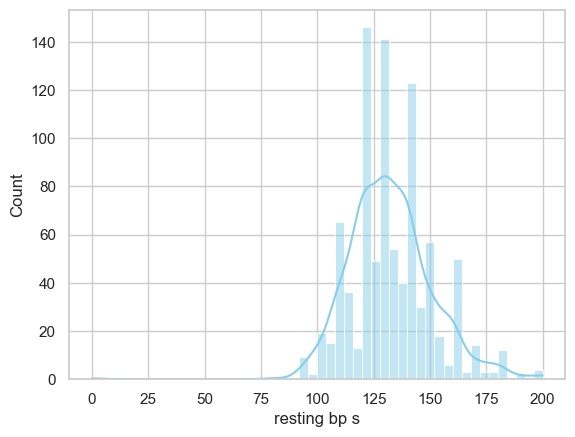

In [327]:
# resting bp s
print("max : " , df["resting bp s"].max(),"| min : ", df["resting bp s"].min())
print("mean : ", df["resting bp s"].mean().round(2))
sns.set(style="whitegrid")
sns.histplot(df["resting bp s"], kde=True, color="skyblue", bins=50)

In [328]:
df[df["resting bp s"] <= 60] # 인간의 혈압이 0인 경우는 죽은 사람에 경우 이다. 해당 데이터는 그 외에도 0인 것이 많으로 삭제한다.

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
449,55,1,3,0,0,0,0,155,0,1.5,2,1


In [329]:
# 이상치 제거
df = df.drop(index=df[df["resting bp s"] <= 60].index, axis=0).reset_index(drop=True)
df[df["resting bp s"] <= 60]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target


max :  200 | min :  80
mean :  132.54


<Axes: xlabel='resting bp s', ylabel='Count'>

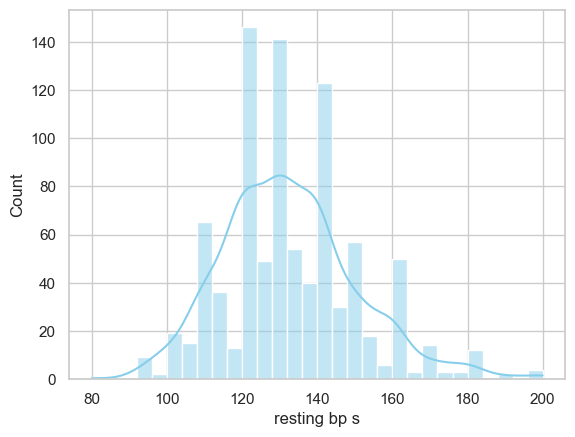

In [330]:
print("max : " , df["resting bp s"].max(),"| min : ", df["resting bp s"].min())
print("mean : ", df["resting bp s"].mean().round(2))
sns.set(style="whitegrid")
sns.histplot(df["resting bp s"], kde=True, color="skyblue", bins=30)

In [338]:
def checkOutlier(data, col, bin=30):
    print("Max : ", data[col].max(), "| Min : ", data[col].min())
    print("Mean : ", data[col].mean())
    sns.set(style="whitegrid")
    sns.histplot(data[col], kde=True, color="skyblue", bins=bin)

Max :  603 | Min :  0
Mean :  199.0163576881134


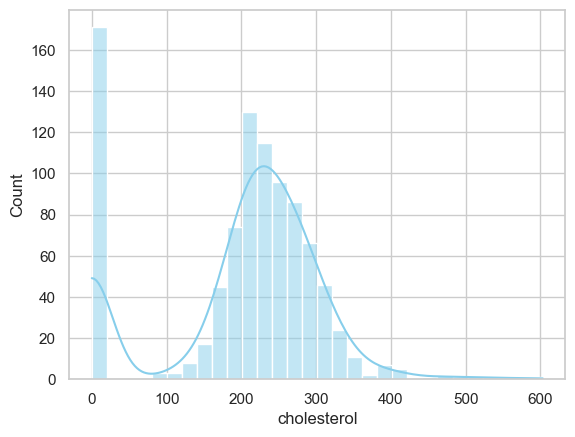

In [339]:
# cholesterol
checkOutlier(df,"cholesterol")

In [344]:
df[df["cholesterol"] < 99]["cholesterol"].value_counts()

cholesterol
0     171
85      1
Name: count, dtype: int64

In [346]:
# 데이터가 생각보다 많으며 만약 다른 데이터와 연관관계 분석 후 해당 데이터를 지우거나 평균값을 데체하여 수정한다.
df[df["cholesterol"] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
293,65,1,4,115,0,0,0,93,1,0.0,2,1
294,32,1,1,95,0,1,0,127,0,0.7,1,1
295,61,1,4,105,0,1,0,110,1,1.5,1,1
296,50,1,4,145,0,1,0,139,1,0.7,2,1
297,57,1,4,110,0,1,1,131,1,1.4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,1,4,122,0,0,0,120,0,0.5,1,1
514,63,1,3,130,0,1,1,160,0,3.0,2,0
517,48,1,3,102,0,1,1,110,1,1.0,3,1
534,56,1,4,130,0,0,2,122,1,1.0,2,1


fasting blood sugar
0    703
1    214
Name: count, dtype: int64


<Axes: xlabel='fasting blood sugar'>

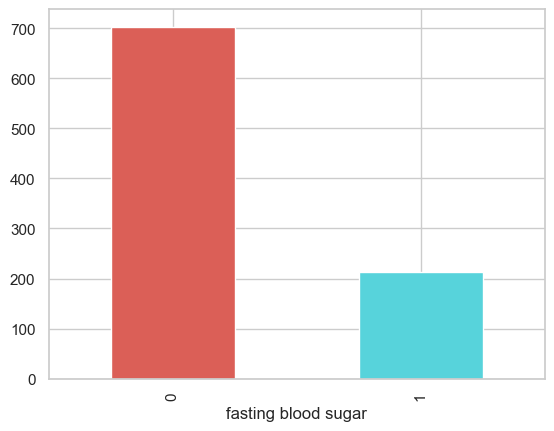

In [351]:
# fasting blood sugar
print(df["fasting blood sugar"].value_counts())
df["fasting blood sugar"].value_counts().plot(kind="bar",color=colors)
# (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 1 => 당뇨 환자

resting ecg
0    551
2    188
1    178
Name: count, dtype: int64


<Axes: xlabel='resting ecg'>

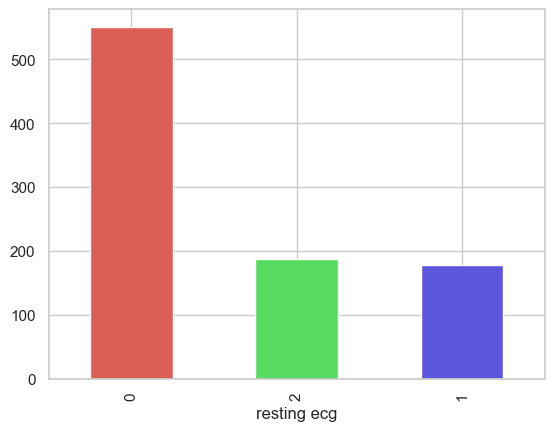

In [356]:
# resting ecg
"""
Value 0: normal  
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
"""
print(df["resting ecg"].value_counts())
colors = sns.color_palette('hls',3)
df["resting ecg"].value_counts().plot(kind="bar",color=colors)


In [331]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,45,1,1,110,264,0,0,132,0,1.2,2,1
913,68,1,4,144,193,1,0,141,0,3.4,2,1
914,57,1,4,130,131,0,0,115,1,1.2,2,1
915,57,0,2,130,236,0,2,174,0,0.0,2,1
